In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('csv_files/salary_data_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,Company Name,Competitors,Founded,Headquarters,Industry,Job Description,Job Title,Location,Rating,...,nltk,power bi,excel,hadoop,azure,scikit-learn,NLP,r_prog,degree_req,job_simplifier
0,0,Punchh,-1,2010,-1,Enterprise Software & Network Solutions,"Punchh creates the consistent, modern experien...",Data Analyst,Jaipur,4.2,...,0,1,0,0,0,0,0,1,0,data analyst
1,1,"Gensuite, LLC",-1,2008,-1,Computer Hardware & Software,Associate Data Analyst\n\nFull Time\nBangalore...,Associate Data Analyst,Bengaluru,3.4,...,0,0,1,0,0,0,0,1,0,data analyst
2,2,GroundTruth,-1,2009,-1,-1,Role: Junior Data Analyst\n\nLocation: Gurgaon...,Junior Data Analyst,Gurgaon,3.4,...,0,0,1,0,0,0,0,1,0,data analyst
3,3,"Amazon.com, Inc.",-1,1994,-1,Internet,Amazon Indias Supply Chain & Analytics team is...,Data Analyst Support,Bengaluru,4.3,...,0,0,1,0,0,0,0,0,0,data analyst
4,4,"Amazon.com, Inc.",-1,1994,-1,Internet,Amazon's Marketplace Trust team works to ensur...,Data Analyst,Bengaluru,4.3,...,0,0,1,0,0,0,0,0,1,data analyst


In [4]:
df.columns

Index(['Unnamed: 0', 'Company Name', 'Competitors', 'Founded', 'Headquarters',
       'Industry', 'Job Description', 'Job Title', 'Location', 'Rating',
       'Revenue', 'Salary Estimate', 'Sector', 'Size', 'Type of ownership',
       'avg_salary', 'min_salary', 'max_salary', 'age', 'python', 'sas', 'aws',
       'spark', 'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel',
       'hadoop', 'azure', 'scikit-learn', 'NLP', 'r_prog', 'degree_req',
       'job_simplifier'],
      dtype='object')

In [5]:
#drop the first column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'avg_salary',
       'min_salary', 'max_salary', 'age', 'python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'NLP', 'r_prog', 'degree_req',
       'job_simplifier'],
      dtype='object')

# Some feature engineering

In [7]:
#determine the seniority for the job
def seniority(job_title):
    if 'senior' in job_title.lower() or 'sr ' in job_title.lower() or 'lead' in job_title.lower() or 'principal' in job_title.lower() or 'sr. ' in job_title.lower():
        return 'senior'
    elif 'junior' in job_title.lower() or 'jr ' in job_title.lower() or 'jr. ' in job_title.lower():
        return 'junior'
    else:
        return 'na'

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        407
senior     64
junior      4
Name: seniority, dtype: int64

In [9]:
# job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2606
1      3982
2      3696
3      3283
4      2105
       ... 
470    4577
471     805
472    2275
473    1268
474    1992
Name: desc_len, Length: 475, dtype: int64

In [10]:
# competitors count
df['competitor_count'] = df['Competitors'].apply(lambda x : len(x.split(',')) if x != '-1' else 0)
df['competitor_count'].value_counts()

0    436
3     32
2      4
1      3
Name: competitor_count, dtype: int64

we need to fill in the max and min salary where it is not available. According to google minimum salary for a data scientist in India is 4lpa but as the job role we have are different we cannot directly assign 4lpa to every role. Out 475 rows 293 have no value for min and max salary.

In [11]:
print("min of max salary: ", min(df['max_salary']))
print("max of max salary: ", max(df['max_salary']))
print("min of min salary: ", min(df['min_salary']))
print("max of min salary: ", max(df['min_salary']))

min of max salary:  0
max of max salary:  6531000
min of min salary:  0
max of min salary:  6025000


# Exploratory data analysis

In [12]:
df.describe()

,Founded,Rating,avg_salary,min_salary,max_salary,age,python,sas,aws,spark,...,power bi,excel,hadoop,azure,scikit-learn,NLP,r_prog,degree_req,desc_len,competitor_count
count,475.00000,475.000000,4.750000e+02,4.750000e+02,4.750000e+02,475.000000,475.000000,475.000000,475.000000,475.000000,...,475.000000,475.000000,475.000000,475.000000,475.000000,475.0,475.000000,475.000000,475.000000,475.000000
mean,1676.72000,3.765684,1.027949e+06,3.305326e+05,4.015074e+05,32.530526,0.585263,0.082105,0.261053,0.273684,...,0.050526,0.469474,0.258947,0.101053,0.046316,0.0,0.218947,0.061053,2939.734737,0.225263
std,717.33974,0.925210,6.948402e+05,6.600465e+05,7.782119e+05,50.669282,0.493196,0.274814,0.439672,0.446319,...,0.219259,0.499593,0.438518,0.301716,0.210390,0.0,0.413969,0.239679,1675.469016,0.772547
min,-1.00000,-1.000000,1.050000e+05,0.000000e+00,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,125.000000,0.000000
25%,1913.00000,3.500000,5.236865e+05,0.000000e+00,0.000000e+00,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1672.000000,0.000000
50%,1996.00000,3.900000,8.641470e+05,0.000000e+00,0.000000e+00,15.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2769.000000,0.000000
75%,2010.00000,4.200000,1.439361e+06,4.590000e+05,5.375000e+05,28.500000,1.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3919.000000,0.000000
max,2019.00000,5.000000,6.278000e+06,6.025000e+06,6.531000e+06,330.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,13260.000000,3.000000


## Analyzing Continous Values

Text(0.5, 1.0, 'Job description length')

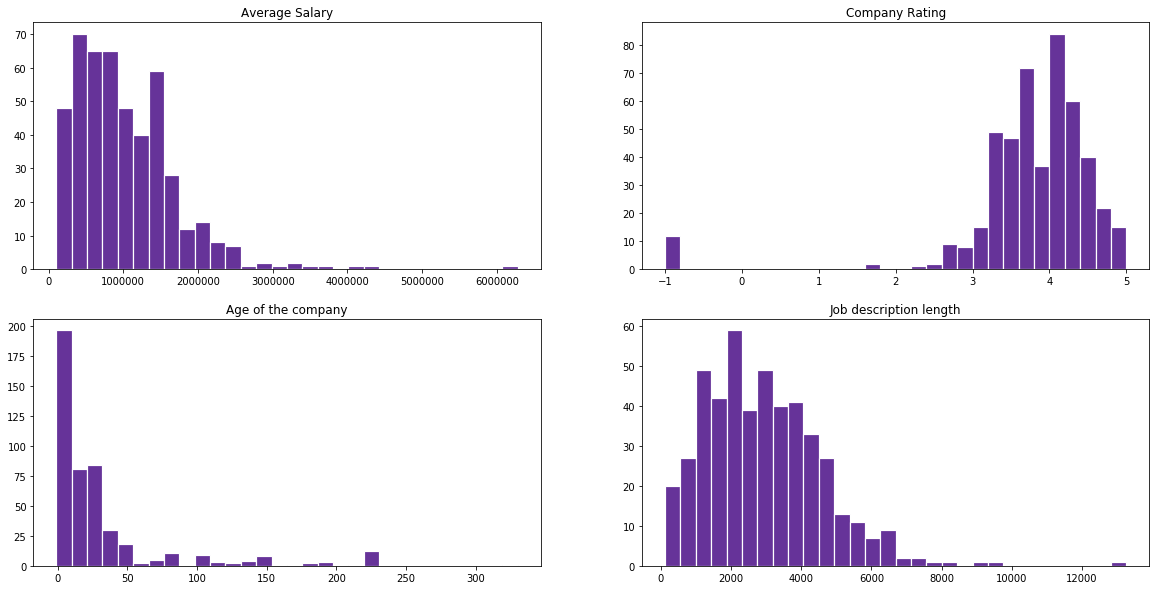

In [13]:
df_cont = df[['avg_salary', 'Rating', 'age','desc_len','competitor_count']]

# plotting histograms
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].hist(df_cont['avg_salary'], bins=30, edgecolor='white', linewidth=1.2,color = "rebeccapurple")
axs[0, 0].set_title('Average Salary')
axs[0, 1].hist(df_cont['Rating'], bins=30, edgecolor='white', linewidth=1.2,color = "rebeccapurple")
axs[0, 1].set_title('Company Rating')
axs[1, 0].hist(df_cont['age'], bins=30, edgecolor='white', linewidth=1.2,color = "rebeccapurple")
axs[1, 0].set_title('Age of the company')
axs[1, 1].hist(df_cont['desc_len'], bins=30, edgecolor='white', linewidth=1.2,color = "rebeccapurple")
axs[1, 1].set_title('Job description length')

* Average salary is normally distributed with mean value of INR 10,27,949.48
* Company rating is normally distributed with mean value of 3.7
* Company age shows exponential distribution with mean value of 32. Mostly many companies are fairly new.
* Job description length is also normally distributed with a mean value of 2939 characters.


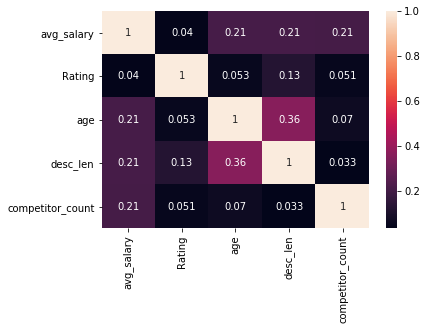

In [14]:
# plot correlation heatmap
sns.heatmap(df_cont.corr(), annot=True)

* The age of the company and the Job description length shows some correlation. Probably the old and established companies must be having an elaborate job description.
* The average salary is correlated with Company age, Job decription length and Competitor count.
* Lastly the Company rating is somewhat correlated with the job decsription length, maybe companies with higher ratings post more elaborate job description.
* It is interesting to see that the Average salary and rating is not highly correlated.

# Analyzing Categorical Values

In [15]:
sns.set(style="white")

In [16]:
df_cat = df[['Location','Industry','Sector','Headquarters','job_simplifier', 'python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'NLP', 'r_prog', 'degree_req',
       'seniority' ]]

graph for Location: total = 29


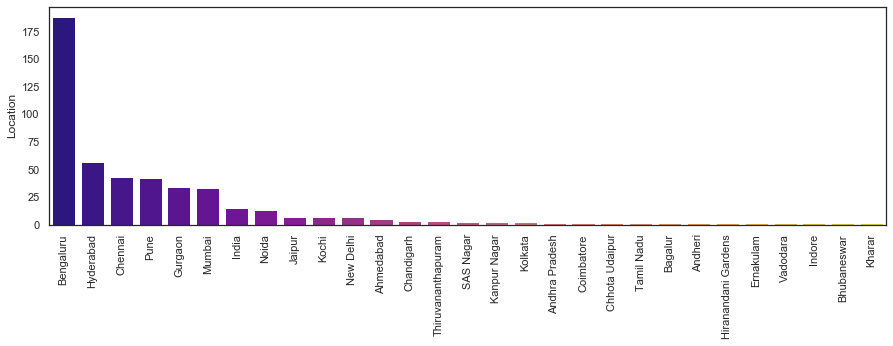

graph for Industry: total = 41


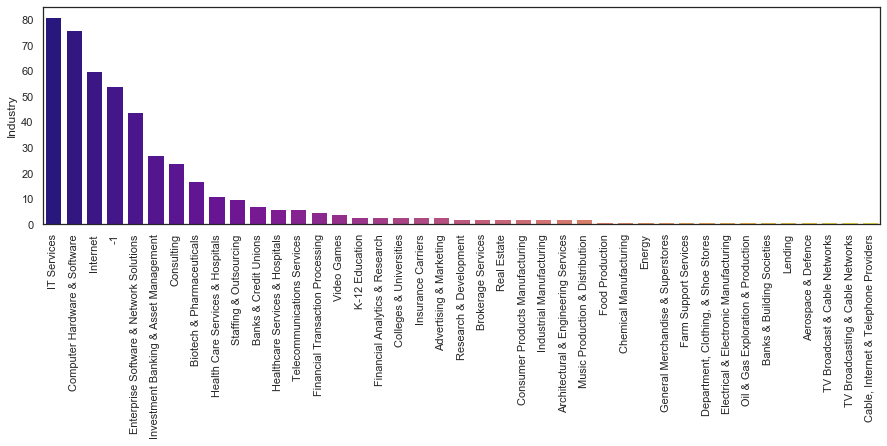

graph for Sector: total = 17


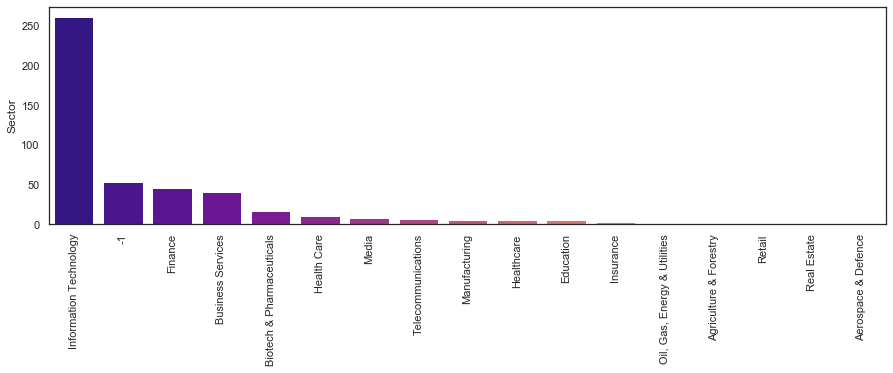

graph for Headquarters: total = 53


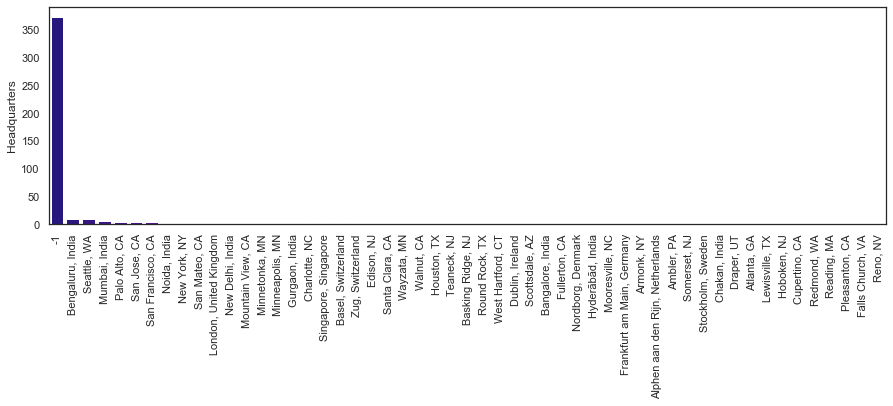

graph for job_simplifier: total = 12


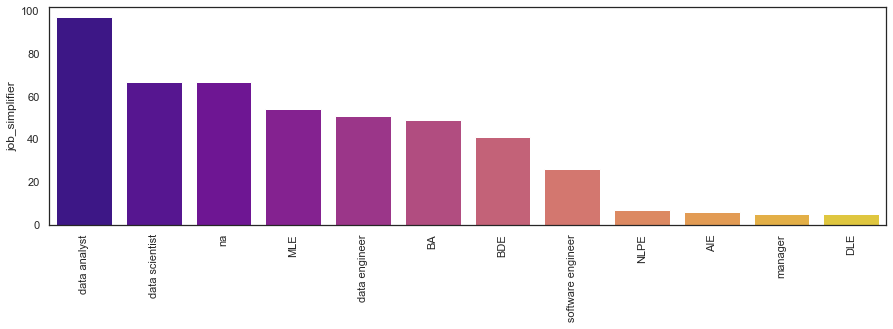

graph for python: total = 2


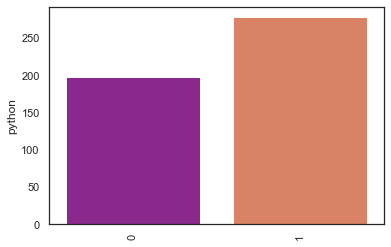

graph for sas: total = 2


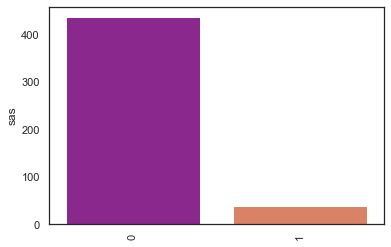

graph for aws: total = 2


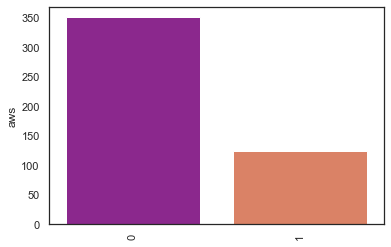

graph for spark: total = 2


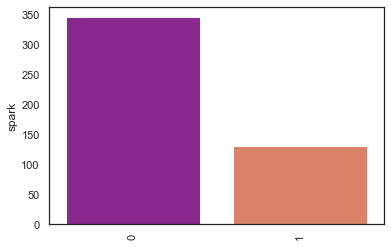

graph for sql: total = 2


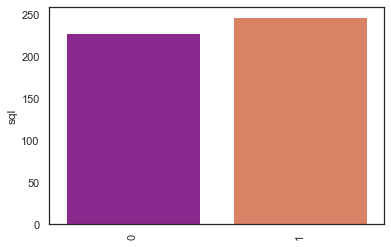

graph for tableau: total = 2


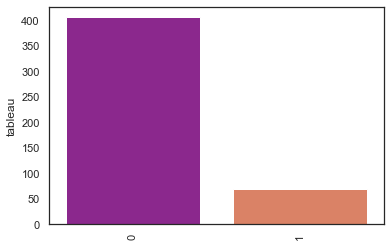

graph for tensorflow: total = 2


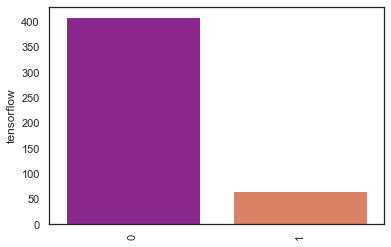

graph for nltk: total = 2


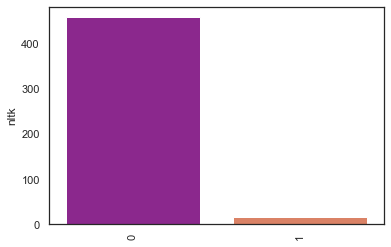

graph for power bi: total = 2


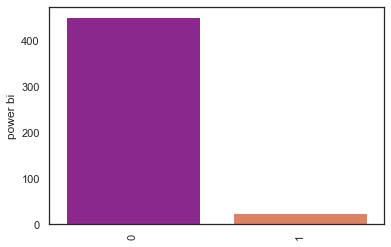

graph for excel: total = 2


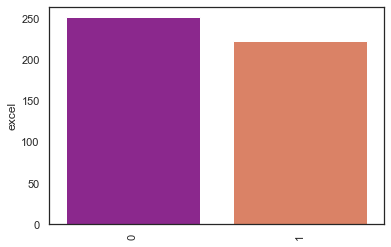

graph for hadoop: total = 2


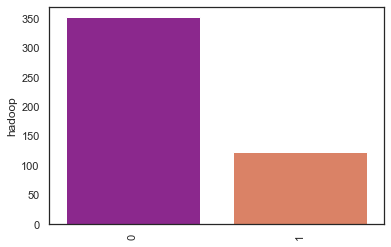

graph for azure: total = 2


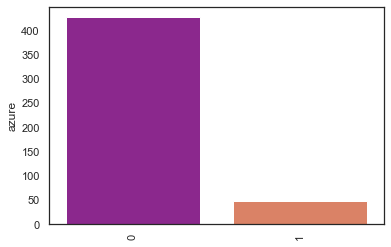

graph for scikit-learn: total = 2


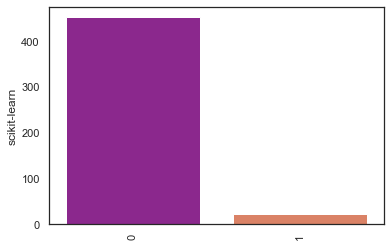

graph for NLP: total = 1


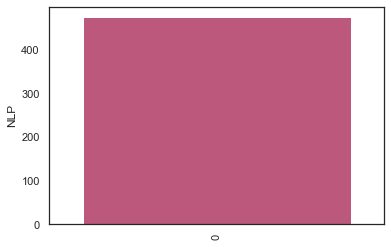

graph for r_prog: total = 2


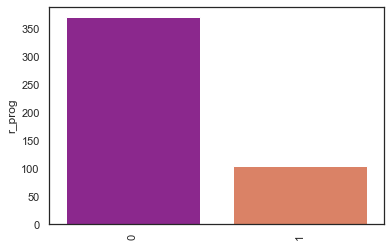

graph for degree_req: total = 2


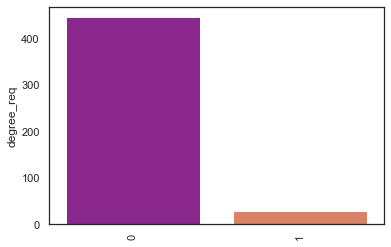

graph for seniority: total = 3


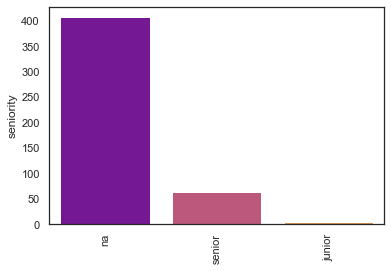

In [17]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    if len(cat_num) > 8:
        plt.figure(figsize=(15,4))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette="plasma")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [18]:
pd.pivot_table(df, index = 'job_simplifier', values = 'avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_simplifier,
data scientist,1.272900e+06
data engineer,1.202376e+06
manager,1.191135e+06
na,1.190953e+06
BDE,1.138436e+06
software engineer,1.043816e+06
MLE,9.729689e+05
NLPE,9.639389e+05
BA,9.403755e+05


In [19]:
pd.pivot_table(df, index = ['job_simplifier','seniority'], values = 'avg_salary')

avg_salary
job_simplifier    seniority              
AIE               na         5.365833e+05
BA                na         9.323690e+05
                  senior     1.030448e+06
BDE               na         1.018160e+06
                  senior     1.634577e+06
DLE               na         3.118960e+05
                  senior     9.747880e+05
MLE               na         9.713936e+05
                  senior     1.056459e+06
NLPE              na         6.311388e+05
                  senior     1.407672e+06
data analyst      junior     5.367500e+05
                  na         7.360727e+05
                  senior     8.847500e+05
data engineer     na         1.178271e+06
                  senior     1.353894e+06
data scientist    na         1.187534e+06
                  senior     1.823034e+06
manager           na         1.191135e+06
na                junior     9.896660e+05
                  na         1.178904e+06
                  senior     1.253013e+06
software engineer na         9.988598e+05
                  senior     1.088773e+06

In [20]:
pd.pivot_table(df, index = ['Location','job_simplifier'], values = 'avg_salary').sort_values('Location')

avg_salary
Location           job_simplifier            
Ahmedabad          BA                800000.0
                   MLE               644500.0
                   data analyst      541277.0
Andheri            data scientist    240000.0
Andhra Pradesh     data scientist   1421000.0
...                                       ...
Tamil Nadu         data analyst     1088500.0
Thiruvananthapuram MLE               900000.0
                   AIE              1250000.0
                   BA                454080.0
Vadodara           data analyst      414000.0

[111 rows x 1 columns]

In [21]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [22]:
pd.pivot_table(df, index = ['Location','job_simplifier'], values = 'avg_salary', aggfunc = 'count').sort_values('Location', ascending = False)

avg_salary
Location            job_simplifier               
Vadodara            data analyst                1
Thiruvananthapuram  MLE                         1
                    BA                          1
                    AIE                         1
Tamil Nadu          data analyst                1
SAS Nagar           data analyst                1
                    BA                          1
Pune                NLPE                        1
                    BA                          7
                    BDE                         2
                    MLE                         5
                    data analyst                5
                    data engineer               6
                    data scientist              9
                    na                          3
                    software engineer           4
Noida               software engineer           1
                    na                          1
                    data scientist              2
                    data analyst                5
                    MLE                         2
                    BA                          2
New Delhi           data analyst                1
                    MLE                         1
                    BDE                         3
                    data engineer               1
                    data scientist              1
Mumbai              software engineer           2
                    na                          7
                    manager                     1
                    data scientist              6
                    data engineer               2
                    data analyst                8
                    NLPE                        2
                    MLE                         3
                    BA                          2
Kolkata             na                          1
                    BA                          1
Kochi               BA                          2
                    data analyst                2
                    na                          2
                    software engineer           1
Kharar              data analyst                1
Kanpur Nagar        MLE                         2
Jaipur              na                          1
                    data analyst                5
                    BA                          1
Indore              BA                          1
India               DLE                         1
                    software engineer           1
                    na                          4
                    data scientist              1
                    data engineer               1
                    data analyst                2
                    MLE                         2
                    BDE                         3
Hyderabad           na                          9
                    data scientist              5
                    data engineer               7
                    data analyst               13
                    NLPE                        1
                    MLE                         6
                    DLE                         2
                    BDE                         4
                    BA                          6
                    AIE                         1
                    software engineer           3
Hiranandani Gardens data analyst                1
Gurgaon             data analyst               11
                    BA                          6
                    BDE                         2
                    MLE                         1
                    na                          8
                    data engineer               1
                    data scientist              3
                    software engineer           2
Ernakulam           na                          1
Coimbatore          MLE                         1
Chhota Udaipur      na                 

In [23]:
pd.pivot_table(df[df.job_simplifier == 'data scientist'], index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
Chennai,1.948841e+06
India,1.427500e+06
Andhra Pradesh,1.421000e+06
Gurgaon,1.380833e+06
Hyderabad,1.318789e+06
Bengaluru,1.269547e+06
Pune,1.266418e+06
New Delhi,9.660000e+05
Mumbai,9.061017e+05


In [24]:
df.columns

Index(['Company Name', 'Competitors', 'Founded', 'Headquarters', 'Industry',
       'Job Description', 'Job Title', 'Location', 'Rating', 'Revenue',
       'Salary Estimate', 'Sector', 'Size', 'Type of ownership', 'avg_salary',
       'min_salary', 'max_salary', 'age', 'python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'NLP', 'r_prog', 'degree_req',
       'job_simplifier', 'seniority', 'desc_len', 'competitor_count'],
      dtype='object')

In [25]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'competitor_count','python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'NLP', 'r_prog', 'Type of ownership','avg_salary']]

In [26]:
for i in df_pivots.columns[:-1]:
    print('_______________________________________________________')
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

_______________________________________________________
Rating
          avg_salary
Rating              
 2.7    1.500000e+06
 4.3    1.480159e+06
 1.8    1.394398e+06
 4.1    1.304603e+06
 3.0    1.271117e+06
 3.9    1.248251e+06
 4.5    1.159890e+06
 3.5    1.068239e+06
 2.8    1.040220e+06
 4.0    1.024014e+06
 3.8    1.020647e+06
 4.2    1.011578e+06
 3.7    9.362921e+05
-1.0    9.142841e+05
 3.4    9.008458e+05
 2.9    8.717386e+05
 3.1    8.610228e+05
 4.4    8.527209e+05
 3.6    8.385965e+05
 4.8    7.519063e+05
 4.9    7.094978e+05
 3.3    6.968749e+05
 4.7    6.955473e+05
 3.2    6.927355e+05
 5.0    6.860733e+05
 2.5    6.514155e+05
 2.3    5.340000e+05
 4.6    3.838480e+05
 2.6    3.770400e+05
_______________________________________________________
Industry
                                           avg_salary
Industry                                             
Oil & Gas Exploration & Production       4.318500e+06
TV Broadcast & Cable Networks            3.084051e+06
Lendi

[Text(0, 0, 'CIB - Data Management - Operations Analyst'),
 Text(0, 0, 'Junior Risk Analyst - Data Quality'),
 Text(0, 0, 'Data Help Analyst, Adv'),
 Text(0, 0, 'Data Research Analyst Marketing - Kolkata, India'),
 Text(0, 0, 'Data Transformation Analyst'),
 Text(0, 0, 'Developer Technology Engineer - AI'),
 Text(0, 0, 'Associate Staff Engineer (Mobile-Hybrid)'),
 Text(0, 0, 'Staff Engineer (Bigdata Admin)'),
 Text(0, 0, 'Technical Services Engineer - Realm'),
 Text(0, 0, 'Software Principal Engineer Java Full Stack'),
 Text(0, 0, 'Network Operations Engineer'),
 Text(0, 0, 'Software Principal Engineer'),
 Text(0, 0, 'Analytics Consultant'),
 Text(0, 0, 'Applied Scientist'),
 Text(0, 0, 'Applied Scientist II'),
 Text(0, 0, 'Data Science'),
 Text(0, 0, 'Senior Data & Applied Scientist'),
 Text(0, 0, 'Research scientist'),
 Text(0, 0, 'Research Scientist'),
 Text(0, 0, 'Junior Research Scientist'),
 Text(0, 0, 'Sr. Research Scientist'),
 Text(0, 0, 'Solutions Expert/Engineer'),
 Text(0, 

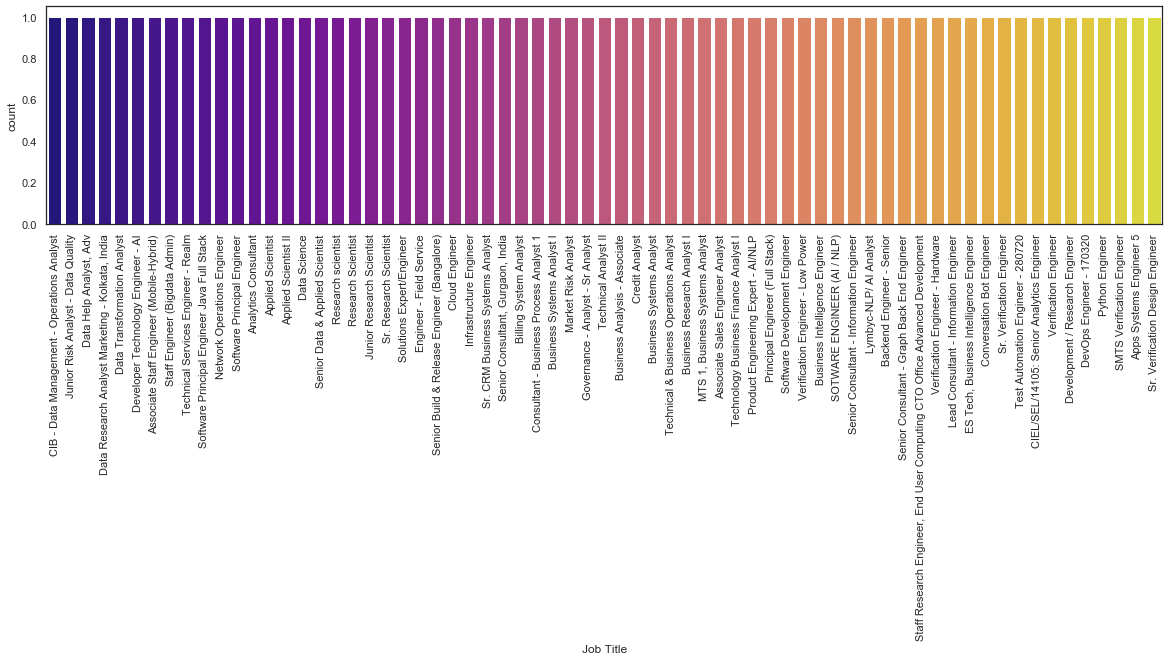

In [27]:
# lets see what other job titles are there apart from the simplified categories
plt.figure(figsize=(20,4))
chart = sns.countplot(df['Job Title'][df['job_simplifier'] == 'na'], palette="")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [28]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
# nltk.download('stopwords')
# nltk.download('punkt')

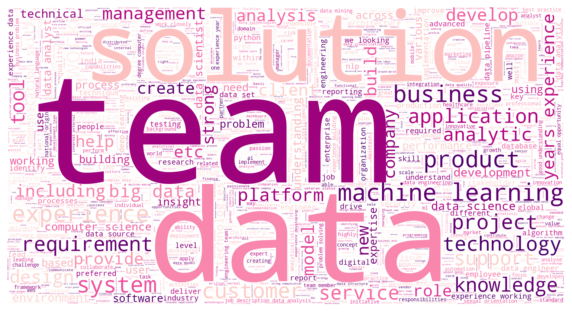

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =1500, height = 800,colormap="RdPu")
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

wc.to_file('eda_word_cloud.png')